# Predicción de rendimiento escolar

## Predicción de ingresos

### Incluye:

- Análisis exploratorio de estado de la data.

- Limpieza de data.

- Análisis descriptivo general de variables latentes.

- Recodificación y manipulación de data.

- Modelación econométrica.

- Análisis teórico desde la econometría, incluyendo estadísticas y parámetros.

- Modelación desde el machine learning para generar modelo de prodicciones. 

- Conclusiones respecto al modelo.

> **Data ficticia** 

### Problema y herramientas de medición. 

El problema está en predecir una calificación académica (valor numérico) de un alumno dada una cantidad de factores sociodemográficos y conductuales. Para lo anterior, se realizará un modelo de regresión lineal utlizando el método de los mínimos cuadrados ordinarios para todos los VO y tambien regresión lineal desde el machine learning.

### Uso de Métricas de ajuste

***Para modelo descriptivo econométrico:***

**R cuadrado ajustado:** Medida que representa la ajustabilidad del modelo a la regresión lineal.  

**F Statistics:** Para medir la capacidad explicativa de un vector por sobre la variacion de la variable dependiente. 

**Valor P:**  Se utilizará siempre para tener una confianza del 95% para no cometer error de tipo 1. 

**Log. Verosimilitud:** Será utilizado para comparar el ajuste de distintos coeficientes en distintos modelos. 

**Corr:** Para verificar la correlación de los vectores.

### Uso de Métricas de desempeño para modelo de clasificación:

**Precision:** Para cuantificar los falsos positivos

**Recall:** Para cuantificar todos los resultados positivos

**Accuracy:** Para revisar el balance entre casos positivos y negativos.

**F1(F.Score):** Es la media entre precision and recall, idealmente un buen modelo se acerca al 1 (0-1).



### Medidas de desempeño para modelo predictivo desde el ML:

**MSE:** Para medir el error cuadrado promedio

**MAE:** Para medir el error absoluto



###  Uso de Librerías para preprocesamiento, visualización y modelación.

■ Python: Lenguaje para codificar, modelar y procesar el ensayo que se realizará. V. 3.9.13

■ Pandas: Para visualizar, modelar, modificar y medir un Data Frame. V.1.5.0

■ Numpy: (utilizada implicitamente por Pandas) permitirá inspeccionar arrays generados, analizar tipo de data. V.1.23.3

■ Seaborn: Utilizada para generar gráficas. V. 0.11.2

■ Matplotlib Utilizada para generar gráficas. V. 3.5.2

■ StatsModel: Utilizada para generar regresion lineal. V. 1.0.2

■ Sklearn: Utilizada para generar gráficas y predicción desde el machine learning. V. 1.0.2 

■ Warnings: Para esconder alertas asociadas a versiones.

■ Otras


### Proceso de preprocesamiento y recodificación de datos.

Para el **pre-procesamiento**, se realizará primero la visualización general de la data para conocer el estado de la misma.

Principalmente se evaluará:
- Encoding correcto
- Cantidad de filas y columnas utilizando herramientas de la libreria Pandas (PD, head, values, etc).
- Cantidad de datos nulos/blancos / carácteres inválidos / columnas que no son vector (índices automáticos u otros valores no significantes)
- Uniformidad de las unidades de medida y tipo de datos (Por ejemplo que una categoría llamada ingresos en CLP posea filas con separación de miles con comas, puntos, símbolos de dinero, entre otros). Verificar si data es string, int, float, object.
- Visualización gráfica de diferentes columnas, utilizando seaborn para gráficas rápidas.
- Visualización y resumen estadístico de la batería de preguntas asociadas a aspectos ambientales. En caso de no tener problemas de sesgo, irrelevancia estadística u otro problema que afecten al modelo, podrían integrarse a la regresión.

#### Recodificación de datos.

- Codificación numérica: Toda la data se deberá evaluar con clasificación numérico ya que se realizarán cálculos matemáticos. 

- Codificacion binaria categórica: Con el objeto de crear un modelo de regresión lineal ajustado  y con la menor cantidad de vectores determinantes, el modelo agradecerá que los vectores categóricos sean clasificados en una variable binaria, ya que estadísticamente es más preciso realizar predicciones cuando existen menos categorías que entrenar que cuando hay más (Bayes). Lo anterior es porque se proyectará un suceso debido a la situación X o Y (de un vector del modelo) y no a las situaciones X, Y o Z (del mismo vector).


### Objetivo
Completar el punto de Descripción.

**● Elementos a considerar en éste hito:**

    ○ La inspección visual del vector objetivo. 

    ○ La inspección visual de las variables. 

    ○ La inspección de datos perdidos en las variables. 



In [1]:
#Importación de librerias y Data Frame para comenzar a manipular los datos

import pandas as pd
import numpy as np
import warnings
import statsmodels.formula.api as smf
warnings.filterwarnings(action="ignore")
from sklearn import linear_model
from sklearn.linear_model import LinearRegression as linreg
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msgno
import factor_analyzer as fact
import funciones as func

In [2]:
# Se importa el Data frame, se realiza encondig, se separa por barra y se botan los unnamed
df = pd.read_csv("students.csv", encoding='iso-8859-1', sep = '|').drop(columns='Unnamed: 0')



**- Inspección de datos perdidos en las variables.**


In [4]:
#Los datos perdidos están clasificados como :  'nulidade', 'sem validade', 'zero' por lo que serán reemplazados a "NaN"

df.replace({'nulidade':np.nan, 'sem validade': np.nan, 'zero':np.nan}, inplace = True)
df.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,NaN,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10
5,GP,M,"""16""",U,LE3,T,4,3,services,other,...,5,4,"""2""",1,2,"""5""",10,15,15,15
6,GP,M,"""16""",U,LE3,T,2,2,other,other,...,4,4,"""4""",1,1,"""3""",0,12,12,11
7,GP,F,"""17""",U,GT3,A,4,4,other,teacher,...,4,1,"""4""",1,1,"""1""",6,6,5,6
8,GP,M,"""15""",U,LE3,A,3,2,services,other,...,4,2,"""2""",1,1,"""1""",0,16,18,19
9,GP,M,"""15""",U,GT3,T,3,4,other,other,...,5,5,"""1""",1,1,"""5""",0,14,15,15



 Visualización general de datos nulos. Se observa gran dispersion entre los perdidos, incluyendo datos perdidos incluso en algunos vectores objetivos


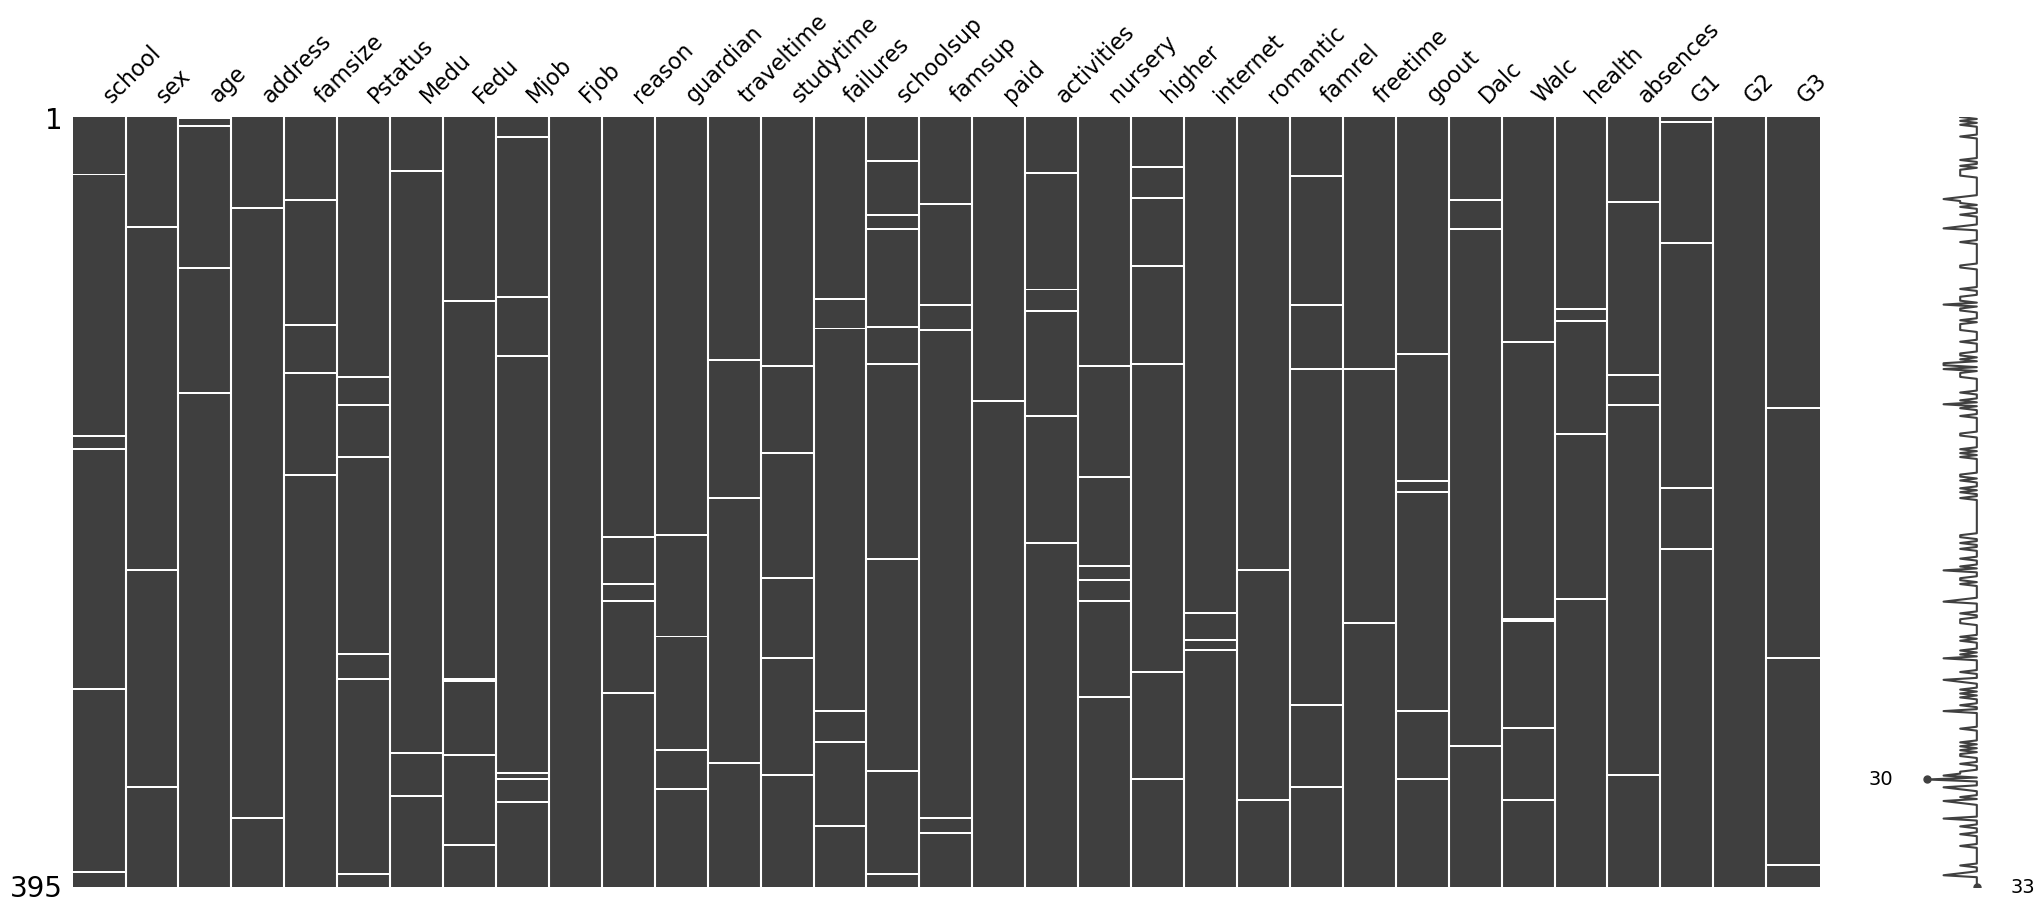

In [5]:
msgno.matrix(df)

print('\n Visualización general de datos nulos. Se observa gran dispersion entre los perdidos, incluyendo datos perdidos incluso en algunos vectores objetivos')

In [6]:
#La cantidad de datos perdidos por cada vector:
df_original = df
df.isnull().sum()

school        5
sex           3
age           4
address       2
famsize       4
Pstatus       6
Medu          3
Fedu          5
Mjob          6
Fjob          0
reason        4
guardian      4
traveltime    3
studytime     5
failures      5
schoolsup     8
famsup        5
paid          1
activities    5
nursery       6
higher        6
internet      3
romantic      2
famrel        5
freetime      2
goout         5
Dalc          3
Walc          5
health        4
absences      4
G1            4
G2            0
G3            3
dtype: int64

In [7]:
df = df.dropna()
df.shape #Visualizo el data

(284, 33)

In [8]:
#Inspección general del Data Frame objetivo
print(f' Total De filas con Nulos DataFrame original:', df_original.shape[0])
print(f' Total De filas sin nulos :', df.shape[0])
print(f' Total filas de nulos eliminados:' , df_original.shape[0] -df.shape[0],'\n')
print('111 datos corresponden a perdidos, por lo que se eliminan y continua el modelo sin esos datos')


 Total De filas con Nulos DataFrame original: 395
 Total De filas sin nulos : 284
 Total filas de nulos eliminados: 111 

111 datos corresponden a perdidos, por lo que se eliminan y continua el modelo sin esos datos


***○ La inspección visual de las variables***

Para ello, se realizará el tratamiento correspondiente a cada variable, para dejar cada vector libre de errores y visualizarlo correctamente.

In [9]:
#Inspección inicial, hay columnas numericas, cadenas de texto y símbolos que no aplican al estudio.
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
5,GP,M,"""16""",U,LE3,T,4,3,services,other,...,5,4,"""2""",1,2,"""5""",10,15,15,15
6,GP,M,"""16""",U,LE3,T,2,2,other,other,...,4,4,"""4""",1,1,"""3""",0,12,12,11
7,GP,F,"""17""",U,GT3,A,4,4,other,teacher,...,4,1,"""4""",1,1,"""1""",6,6,5,6


In [10]:
#Reemplazaré los simbolos ' " ' del DF. (fuente: https://es.stackoverflow.com/questions/481909/como-borrar-caracteres-en-un-object-de-un-dataframe-python)

df["age"] = df["age"].apply(lambda x: x.replace('"',""))
df["goout"] = df["goout"].apply(lambda x: x.replace('"',""))
df["health"] = df["health"].apply(lambda x: x.replace('"',""))


In [11]:
#Convierto a tipo numéricos los que correspondan ya que por defecto el DF los trató como OBJECT.

df['age'] = df['age'].astype(float)
df['Medu'] = df['Medu'].astype(float)
df['Fedu'] = df['Fedu'].astype(float)
df['failures'] = df['failures'].astype(float)
df['freetime'] = df['freetime'].astype(float)
df['goout'] = df['goout'].astype(float)
df['Dalc'] = df['Dalc'].astype(float)
df['health'] = df['health'].astype(float)
df['absences'] = df['absences'].astype(float)
df['G1'] = df['G1'].astype(float)
df['G2'] = df['G2'].astype(float)
df['G3'] = df['G3'].astype(float)
df['famrel'] = df['famrel'].astype(float)
df['health'] = df['health'].astype(float)


#Recodifico el V.O a binario con np.where
#df["income_recod"] = np.where(df["income_recod"] == "<=50K", 0, 1)

In [12]:
#Se reemplazan a binario las columnas categoricas.

df["school"] = np.where(df["school"] == "MS", 1, 0)
df["sex"] = np.where(df["sex"] == "M", 1, 0)
df["address"] = np.where(df["address"] == "R", 1, 0)
df["famsize"] = np.where(df["famsize"] == "LE3", 1, 0)
df["Pstatus"] = np.where(df["Pstatus"] == "A", 1, 0)
df["schoolsup"] = np.where(df["schoolsup"] == "yes", 1, 0)
df["famsup"] = np.where(df["famsup"] == "no", 1, 0)
df["paid"] = np.where(df["paid"] == "yes", 1, 0)
df["activities"] = np.where(df["activities"] == "no", 1, 0)
df["nursery"] = np.where(df["nursery"] == "no", 1, 0)
df["higher"] = np.where(df["higher"] == "no", 1, 0)
df["internet"] = np.where(df["internet"] == "no", 1, 0)
df["romantic"] = np.where(df["romantic"] == "yes", 1, 0)

#Se reemplazan los nombres de las columnas recodificadas

#df.rename(columns = {'occupation':'collars'}, inplace = True)


In [13]:
#Realizo el get dummies para las variables numericas con escala finita y definida.
#Activo el Drop_first=True para eliminar la primera columna así reducimos errres de colinealidad (teoria de Gauss-Markov)

df_dummies = pd.get_dummies(df, drop_first= True)

In [14]:
#Se inspecciona que los datos estén convertidos a numero.
df_dummies.dtypes


school                 int32
sex                    int32
age                  float64
address                int32
famsize                int32
Pstatus                int32
Medu                 float64
Fedu                 float64
failures             float64
schoolsup              int32
famsup                 int32
paid                   int32
activities             int32
nursery                int32
higher                 int32
internet               int32
romantic               int32
famrel               float64
freetime             float64
goout                float64
Dalc                 float64
health               float64
absences             float64
G1                   float64
G2                   float64
G3                   float64
Mjob_health            uint8
Mjob_other             uint8
Mjob_services          uint8
Mjob_teacher           uint8
Fjob_health            uint8
Fjob_other             uint8
Fjob_services          uint8
Fjob_teacher           uint8
reason_home   

In [15]:
#Se revisa que el DF Dummies esté libre de caracteres distinto de numeros que afecten al modelo
df_dummies.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,failures,schoolsup,...,traveltime_2,traveltime_3,traveltime_4,studytime_2,studytime_3,studytime_4,Walc_2,Walc_3,Walc_4,Walc_5
1,0,0,17.0,0,0,0,1.0,1.0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,15.0,0,0,0,4.0,2.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,1,16.0,0,1,0,4.0,3.0,0.0,0,...,0,0,0,1,0,0,1,0,0,0
6,0,1,16.0,0,1,0,2.0,2.0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
7,0,0,17.0,0,0,1,4.0,4.0,0.0,1,...,1,0,0,1,0,0,0,0,0,0


In [16]:
#Establezco el DF DUMMY Como objeto llamado DF.
df =  df_dummies

In [17]:
#Cuadro resumen estadísticos de tendencia central
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,failures,schoolsup,...,traveltime_2,traveltime_3,traveltime_4,studytime_2,studytime_3,studytime_4,Walc_2,Walc_3,Walc_4,Walc_5
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.00000,284.000000,284.000000,284.000000,284.000000,...,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,0.130282,0.482394,16.707746,0.246479,0.264085,0.09507,2.774648,2.521127,0.334507,0.133803,...,0.295775,0.063380,0.017606,0.489437,0.179577,0.066901,0.204225,0.190141,0.133803,0.063380
std,0.337207,0.500572,1.284238,0.431721,0.441623,0.29383,1.095409,1.091038,0.730994,0.341041,...,0.457196,0.244076,0.131745,0.500771,0.384513,0.250292,0.403846,0.393105,0.341041,0.244076
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,0.00000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,0.000000,0.000000,0.00000,3.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,18.000000,0.000000,1.000000,0.00000,4.000000,3.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,21.000000,1.000000,1.000000,1.00000,4.000000,4.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
#Calculo de  bartlett sphericity
corte, pvalor = fact.calculate_bartlett_sphericity(df)
assert pvalor < 0.05
print(f' el p valor es menor a 0.05 por lo que se puede continuar con el análisis factorial. {pvalor}')

 el p valor es menor a 0.05 por lo que se puede continuar con el análisis factorial. 0.0


In [19]:
kmo_ind, kmo_gral = fact.calculate_kmo(df)
print(f' El calculo del KMO es de {kmo_gral} por lo que no se puede continuar con el análisis factorial')

 El calculo del KMO es de 0.4578682221068 por lo que no se puede continuar con el análisis factorial


***Inspección visual de los vectores objetivos***

In [55]:
print(f'Resumen estadístico de las notas del Primer semestre \n',df['G1'].describe())


Resumen estadístico de las notas del Primer semestre 
 count    284.000000
mean      10.933099
std        3.289199
min        4.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G1, dtype: float64


In [56]:
print(f'Resumen estadístico de las notas del Segundo semestre\n',df['G2'].describe())

Resumen estadístico de las notas del Segundo semestre
 count    284.000000
mean      10.640845
std        3.789220
min        0.000000
25%        9.000000
50%       10.500000
75%       13.000000
max       19.000000
Name: G2, dtype: float64


In [57]:
print(f'Resumen estadístico de las notas del Promedio Final\n',df['G3'].describe())

Resumen estadístico de las notas del Promedio Final
 count    284.000000
mean      10.394366
std        4.565902
min        0.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       20.000000
Name: G3, dtype: float64


#Se generan gráficas para observar las VO, función contenida en el import de "funciones.py"


 Histograma de G1
La media de notas en el primer semestre fue de 10.5


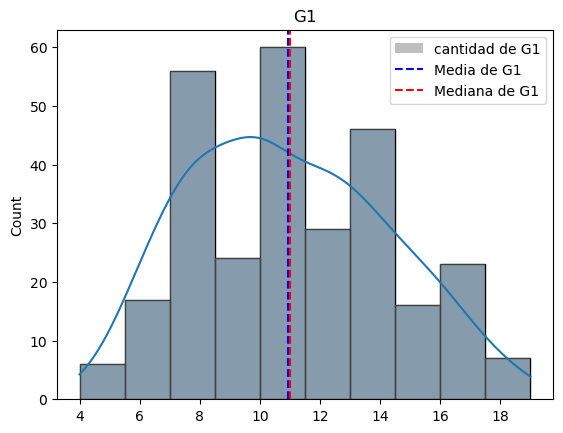

In [58]:
func.plot_hist(df,"G1")
print("La media de notas en el primer semestre fue de 10.5")

 Histograma de G2
la Variable dependiente G2 demuestra que la mayoria de los datos se concentra entre 6 y  y 15 . La media es 10.6


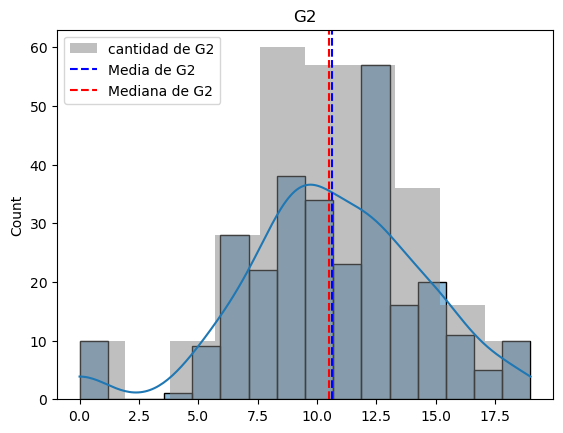

In [59]:
func.plot_hist(df,"G2")
print("la Variable dependiente G2 demuestra que la mayoria de los datos se concentra entre 6 y  y 15 . La media es 10.6")

 Histograma de G3
la Media de notas del promedio es 10.3. Reducida respecto a las otras variables pero no significativamente 


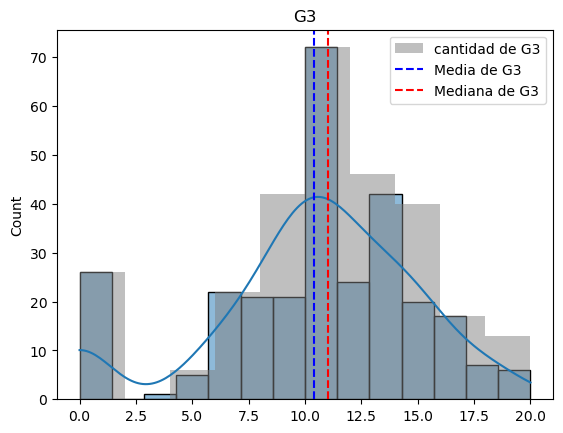

In [60]:
func.plot_hist(df,"G3")
print("la Media de notas del promedio es 10.3. Reducida respecto a las otras variables pero no significativamente ")

#### Comentarios de gráficas y conclusiones.

Al comparar las 3 gráficas, el primero presenta un mejor ajuste visual a lo que podría ser una distribución normal. 

Los otros dos concentran una cantidad sifnificativa de valores hacia la izquierda. Si bien podría representar mucha dispersión y alto sesgo en los datos, esto es solo preliminar con la data original. Posteriormente se deben analizar los vectores para eliminar lo que no aporte y poder estandarizar el modelo.

Se visualiza que el promedio de notas (G3) disminuye al insertar G2, por lo que claramente en el segundo semestre los alumnos disminuyen su rendimiento. 

Se eliminó cerca del 30% de la muestra , lo que podría afectar al modelo considerando que al traer a dummies los vectores categóricos, se generan muchas columnas por lo que los modelos tendrán que entrenar muchas causales con pocos resultados conocidos.

# DESARROLLO  HITO 3 DESAFIO 2


#### Completar el punto de Modelación descriptiva.

● Elementos a considerar en éste hito:

    ○ La modelación mediante regresión de ambos problemas. (4 puntos)
    
    ○ La interpretación de los principales regresores en cada problema. (4 puntos)
    
    ○ La definición de las estrategias de Modelación predictiva. (2 puntos)
    


 ### Modelación mediante regresión de ambos problemas


In [20]:
#Se generan regresiones lineales para cada VO con el método de los MCO. 

vect_del= df.drop(['G1', 'G2', 'G3', ], axis=1) # Quito los vectores objetivos del DF.
todos_los_regresores = '+ '.join(vect_del)


In [63]:
#Se genera el primer modelo de análisis regresivo.

g1_full = smf.ols(f" G1 ~  {todos_los_regresores}", data=df).fit()
g1_full.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.230    
Dependent Variable: G1               AIC:                1450.6260
Date:               2022-11-21 13:07 BIC:                1622.1278
No. Observations:   284              Log-Likelihood:     -678.31  
Df Model:           46               F-statistic:        2.838    
Df Residuals:       237              Prob (F-statistic): 1.39e-07 
R-squared:          0.355            Scale:              8.3302   
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          10.2758   3.4210  3.0037 0.0030  3.5363 17.0153
school             -0.2968   0.6733 -0.4408 0.6597 -1.6232  1.0296
sex                 0.8050   0.4368  1.8430 0.0666 -0.0555  1.6654
age                 0.0549   0.1856  0.2957 0.7677 -0.3107  0.4205
address            -0.1423   0.4900 -0.2904 0.7718 -1.1075  0.8230
famsize             0.3657   0.4428  0.8258 0.4097 -0.5067  1.2381
Pstatus             0.2508   0.6534  0.3839 0.7014 -1.0364  1.5380
Medu                0.0857   0.2850  0.3006 0.7640 -0.4758  0.6471
Fedu                0.1613   0.2389  0.6752 0.5002 -0.3094  0.6320
failures           -1.0896   0.2839 -3.8385 0.0002 -1.6489 -0.5304
schoolsup          -1.6855   0.5696 -2.9593 0.0034 -2.8075 -0.5634
famsup              1.0723   0.4164  2.5750 0.0106  0.2519  1.8927
paid                0.1739   0.4078  0.4264 0.6702 -0.6295  0.9773
activities          0.4090   0.3725  1.0981 0.2733 -0.3247  1.1428
nursery            -0.0209   0.4552 -0.0459 0.9635 -0.9177  0.8759
higher             -1.1415   0.8798 -1.2975 0.1957 -2.8747  0.5916
internet            0.0238   0.5133  0.0465 0.9630 -0.9875  1.0352
romantic            0.0179   0.4112  0.0434 0.9654 -0.7923  0.8280
famrel              0.1214   0.2178  0.5575 0.5777 -0.3076  0.5504
freetime            0.4448   0.1960  2.2698 0.0241  0.0587  0.8309
goout              -0.7138   0.2014 -3.5438 0.0005 -1.1106 -0.3170
Dalc               -0.1052   0.2963 -0.3549 0.7230 -0.6889  0.4786
health             -0.3155   0.1423 -2.2172 0.0276 -0.5958 -0.0352
absences            0.0044   0.0249  0.1785 0.8585 -0.0445  0.0534
Mjob_health         1.3794   0.9237  1.4933 0.1367 -0.4403  3.1992
Mjob_other         -0.3515   0.6006 -0.5853 0.5589 -1.5347  0.8316
Mjob_services       0.6090   0.6783  0.8978 0.3702 -0.7273  1.9454
Mjob_teacher       -0.9007   0.8371 -1.0760 0.2830 -2.5499  0.7485
Fjob_health        -0.7823   1.3118 -0.5963 0.5515 -3.3666  1.8020
Fjob_other         -1.1695   0.9930 -1.1777 0.2401 -3.1257  0.7868
Fjob_services      -0.5640   0.9987 -0.5647 0.5728 -2.5314  1.4035
Fjob_teacher        1.2376   1.2050  1.0270 0.3054 -1.1363  3.6115
reason_home         0.3994   0.4734  0.8436 0.3997 -0.5333  1.3321
reason_other       -0.0107   0.6789 -0.0158 0.9874 -1.3482  1.3268
reason_reputation   0.5578   0.4945  1.1281 0.2604 -0.4163  1.5320
guardian_mother     0.2494   0.4843  0.5149 0.6071 -0.7047  1.2034
guardian_other      0.0438   0.8629  0.0507 0.9596 -1.6562  1.7438
traveltime_2       -0.3659   0.4256 -0.8599 0.3907 -1.2043  0.4724
traveltime_3        1.3042   0.8218  1.5871 0.1138 -0.3147  2.9231
traveltime_4       -1.5816   1.4892 -1.0621 0.2893 -4.5154  1.3521
studytime_2         0.0409   0.4691  0.0871 0.9307 -0.8833  0.9651
studytime_3         1.1981   0.6346  1.8881 0.0602 -0.0520  2.4482
studytime_4         1.6488   0.8575  1.9228 0.0557 -0.0405  3.3381
Walc_2              0.4069   0.5099  0.7980 0.4257 -0.5976  1.4113
Walc_3              0.3579   0.5637  0.6349 0.5261 -0.7527  1.4685
Walc_4              0.0164   0.7307  0.0224 0.9821 -1.4231  1.4559
Walc_5              1.0509   1.0958  0.9591 0.3385 -1.1078  3.2097
----------------

In [64]:
#Separo los significativos
table = g1_full.summary2().tables[1]
table_significativos = table[table['P>|t|'] <= 0.025].index.drop('Intercept').tolist()
table_significativos_g1 = '+ '.join(table_significativos)

table_significativos_g1

'failures+ schoolsup+ famsup+ freetime+ goout'

In [65]:
#modelo G1 depurado, solo con regresores significativos

g1_depurado = smf.ols(f" G1 ~  {table_significativos_g1}", data=df).fit()
g1_depurado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     13.92
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           3.80e-12
Time:                        13:07:56   Log-Likelihood:                -708.89
No. Observations:                 284   AIC:                             1430.
Df Residuals:                     278   BIC:                             1452.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.4232      0.722     17.208      0.000      11.002      13.844
failures      -1.3594      0.245     -5.549      0.000      -1.842      -0.877
schoolsup     -1.9149      0.524     -3.656      0.000      -2.946      -0.884
famsup         0.6177      0.366      1.688      0.092      -0.103       1.338
freetime       0.3045      0.179      1.705      0.089      -0.047       0.656
goout         -0.6448      0.171     -3.764      0.000      -0.982      -0.308
==============================================================================
Omnibus:                        4.676   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                4.129
Skew:                           0.219   Prob(JB):                        0.127
Kurtosis:                       2.604   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# Modelo para el VO G2

g2_full = smf.ols(f" G2 ~  {todos_los_regresores}", data=df).fit()
g2_full.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.197    
Dependent Variable: G2               AIC:                1542.9151
Date:               2022-11-21 13:07 BIC:                1714.4168
No. Observations:   284              Log-Likelihood:     -724.46  
Df Model:           46               F-statistic:        2.510    
Df Residuals:       237              Prob (F-statistic): 3.60e-06 
R-squared:          0.328            Scale:              11.529   
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          13.2393   4.0246  3.2896 0.0012  5.3108 21.1679
school              0.3484   0.7921  0.4399 0.6604 -1.2120  1.9088
sex                 0.8910   0.5138  1.7340 0.0842 -0.1213  1.9033
age                -0.0720   0.2183 -0.3296 0.7420 -0.5021  0.3581
address            -0.8675   0.5764 -1.5050 0.1337 -2.0030  0.2680
famsize             0.4804   0.5209  0.9223 0.3573 -0.5458  1.5067
Pstatus             0.6051   0.7687  0.7873 0.4319 -0.9091  2.1194
Medu                0.2095   0.3353  0.6247 0.5327 -0.4511  0.8700
Fedu               -0.1015   0.2811 -0.3609 0.7185 -0.6552  0.4523
failures           -1.0917   0.3339 -3.2692 0.0012 -1.7496 -0.4338
schoolsup          -0.9825   0.6700 -1.4664 0.1439 -2.3025  0.3375
famsup              1.1648   0.4899  2.3776 0.0182  0.1997  2.1299
paid                0.6516   0.4797  1.3582 0.1757 -0.2935  1.5967
activities          0.2153   0.4382  0.4914 0.6236 -0.6479  1.0785
nursery            -0.2420   0.5355 -0.4518 0.6518 -1.2970  0.8130
higher             -1.3113   1.0350 -1.2670 0.2064 -3.3503  0.7276
internet           -0.4852   0.6039 -0.8035 0.4225 -1.6750  0.7045
romantic           -0.6102   0.4838 -1.2612 0.2085 -1.5633  0.3429
famrel              0.0305   0.2562  0.1190 0.9054 -0.4742  0.5352
freetime            0.4122   0.2305  1.7882 0.0750 -0.0419  0.8664
goout              -0.9390   0.2370 -3.9626 0.0001 -1.4058 -0.4722
Dalc               -0.3124   0.3486 -0.8961 0.3711 -0.9991  0.3743
health             -0.3960   0.1674 -2.3659 0.0188 -0.7258 -0.0663
absences            0.0002   0.0292  0.0077 0.9938 -0.0574  0.0578
Mjob_health         1.6767   1.0867  1.5429 0.1242 -0.4641  3.8175
Mjob_other          0.1780   0.7065  0.2519 0.8013 -1.2139  1.5699
Mjob_services       0.7603   0.7980  0.9528 0.3417 -0.8118  2.3324
Mjob_teacher       -0.7093   0.9848 -0.7202 0.4721 -2.6495  1.2308
Fjob_health        -0.1001   1.5432 -0.0649 0.9483 -3.1403  2.9401
Fjob_other         -0.3602   1.1682 -0.3083 0.7581 -2.6616  1.9412
Fjob_services       0.5551   1.1749  0.4724 0.6370 -1.7595  2.8696
Fjob_teacher        1.5758   1.4176  1.1116 0.2674 -1.2169  4.3685
reason_home         0.4609   0.5570  0.8275 0.4088 -0.6363  1.5581
reason_other        0.6139   0.7987  0.7687 0.4429 -0.9595  2.1874
reason_reputation   0.6526   0.5817  1.1219 0.2631 -0.4934  1.7986
guardian_mother     0.1176   0.5697  0.2064 0.8366 -1.0048  1.2400
guardian_other     -0.2902   1.0152 -0.2859 0.7752 -2.2901  1.7097
traveltime_2       -0.4065   0.5006 -0.8120 0.4176 -1.3928  0.5797
traveltime_3        1.0204   0.9667  1.0555 0.2923 -0.8841  2.9248
traveltime_4       -3.0877   1.7519 -1.7625 0.0793 -6.5390  0.3636
studytime_2        -0.0606   0.5519 -0.1098 0.9127 -1.1479  1.0267
studytime_3         0.8812   0.7465  1.1804 0.2390 -0.5895  2.3518
studytime_4         1.4134   1.0088  1.4011 0.1625 -0.5739  3.4007
Walc_2              0.0678   0.5998  0.1131 0.9100 -1.1138  1.2495
Walc_3              0.7748   0.6632  1.1683 0.2439 -0.5317  2.0814
Walc_4              0.3511   0.8596  0.4085 0.6833 -1.3423  2.0446
Walc_5              2.5882   1.2891  2.0077 0.0458  0.0486  5.1278
----------------

In [67]:
#Separo los regresores significaticos del VO G2

table_g2 = g2_full.summary2().tables[1]
table_significativos_g2 = table_g2[table['P>|t|'] <= 0.025].index.drop('Intercept').tolist()
table_significativos_g2 = '+ '.join(table_significativos_g2)

table_significativos_g2




'failures+ schoolsup+ famsup+ freetime+ goout'

In [68]:
g2_depurado = smf.ols(f" G2 ~  {table_significativos_g2}", data=df).fit()
g2_depurado.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.147    
Dependent Variable: G2               AIC:                1523.4016
Date:               2022-11-21 13:07 BIC:                1545.2955
No. Observations:   284              Log-Likelihood:     -755.70  
Df Model:           5                F-statistic:        10.75    
Df Residuals:       278              Prob (F-statistic): 1.82e-09 
R-squared:          0.162            Scale:              12.247   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      12.3390    0.8513  14.4942  0.0000  10.6631  14.0148
failures       -1.5332    0.2889  -5.3073  0.0000  -2.1019  -0.9645
schoolsup      -1.0968    0.6176  -1.7760  0.0768  -2.3124   0.1189
famsup          0.6528    0.4314   1.5130  0.1314  -0.1965   1.5021
freetime        0.3058    0.2106   1.4520  0.1476  -0.1088   0.7204
goout          -0.7346    0.2020  -3.6368  0.0003  -1.1322  -0.3370
------------------------------------------------------------------
Omnibus:               20.756       Durbin-Watson:          1.794 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       27.352
Skew:                  -0.541       Prob(JB):               0.000 
Kurtosis:              4.068        Condition No.:          20    
==================================================================

"""

In [69]:
# Modelo para el VO G3

g3_full = smf.ols(f" G3 ~  {todos_los_regresores}", data=df).fit()
g3_full.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.214    
Dependent Variable: G3               AIC:                1642.6746
Date:               2022-11-21 13:07 BIC:                1814.1764
No. Observations:   284              Log-Likelihood:     -774.34  
Df Model:           46               F-statistic:        2.678    
Df Residuals:       237              Prob (F-statistic): 6.89e-07 
R-squared:          0.342            Scale:              16.381   
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          13.1086   4.7973  2.7325 0.0068  3.6578 22.5594
school              1.1520   0.9441  1.2202 0.2236 -0.7079  3.0120
sex                 1.0683   0.6125  1.7443 0.0824 -0.1383  2.2750
age                -0.1485   0.2602 -0.5706 0.5688 -0.6611  0.3642
address            -1.0133   0.6871 -1.4747 0.1416 -2.3668  0.3403
famsize             0.4395   0.6210  0.7077 0.4798 -0.7839  1.6628
Pstatus             1.0939   0.9162  1.1939 0.2337 -0.7111  2.8989
Medu                0.3856   0.3997  0.9649 0.3356 -0.4017  1.1730
Fedu               -0.2861   0.3351 -0.8539 0.3940 -0.9462  0.3740
failures           -1.4152   0.3981 -3.5552 0.0005 -2.1994 -0.6310
schoolsup          -1.0819   0.7987 -1.3546 0.1768 -2.6553  0.4916
famsup              1.1146   0.5840  1.9087 0.0575 -0.0358  2.2650
paid                0.7761   0.5719  1.3572 0.1760 -0.3504  1.9027
activities          0.6571   0.5223  1.2581 0.2096 -0.3718  1.6860
nursery            -0.1904   0.6384 -0.2982 0.7658 -1.4479  1.0672
higher             -2.0008   1.2337 -1.6218 0.1062 -4.4313  0.4296
internet           -0.4714   0.7199 -0.6548 0.5132 -1.8895  0.9468
romantic           -0.8863   0.5767 -1.5369 0.1256 -2.0224  0.2498
famrel              0.4052   0.3054  1.3271 0.1858 -0.1963  1.0068
freetime            0.5611   0.2748  2.0418 0.0423  0.0197  1.1025
goout              -1.1756   0.2825 -4.1618 0.0000 -1.7320 -0.6191
Dalc               -0.7233   0.4155 -1.7408 0.0830 -1.5419  0.0953
health             -0.4059   0.1995 -2.0341 0.0431 -0.7989 -0.0128
absences            0.0453   0.0348  1.3011 0.1945 -0.0233  0.1140
Mjob_health         1.7462   1.2953  1.3481 0.1789 -0.8056  4.2981
Mjob_other          0.5380   0.8422  0.6388 0.5236 -1.1212  2.1971
Mjob_services       1.0093   0.9512  1.0611 0.2897 -0.8646  2.8833
Mjob_teacher       -0.7351   1.1739 -0.6262 0.5318 -3.0478  1.5776
Fjob_health        -0.1862   1.8395 -0.1012 0.9195 -3.8102  3.4377
Fjob_other         -0.8329   1.3925 -0.5981 0.5503 -3.5762  1.9103
Fjob_services       0.0159   1.4005  0.0114 0.9910 -2.7431  2.7749
Fjob_teacher        1.5213   1.6898  0.9003 0.3689 -1.8076  4.8502
reason_home         0.2341   0.6639  0.3526 0.7247 -1.0738  1.5420
reason_other        0.7971   0.9521  0.8373 0.4033 -1.0784  2.6727
reason_reputation   1.0794   0.6934  1.5567 0.1209 -0.2866  2.4454
guardian_mother     0.3046   0.6791  0.4485 0.6542 -1.0333  1.6424
guardian_other     -0.8882   1.2101 -0.7340 0.4637 -3.2721  1.4957
traveltime_2       -0.6945   0.5968 -1.1638 0.2457 -1.8701  0.4811
traveltime_3        1.3779   1.1523  1.1958 0.2330 -0.8922  3.6481
traveltime_4       -1.8031   2.0883 -0.8634 0.3888 -5.9170  2.3109
studytime_2        -0.3039   0.6579 -0.4619 0.6446 -1.5999  0.9921
studytime_3         1.0655   0.8899  1.1974 0.2323 -0.6875  2.8185
studytime_4         0.8321   1.2025  0.6920 0.4896 -1.5368  3.2010
Walc_2              0.0826   0.7150  0.1156 0.9081 -1.3259  1.4912
Walc_3              1.4875   0.7905  1.8816 0.0611 -0.0699  3.0449
Walc_4              1.1738   1.0247  1.1456 0.2531 -0.8448  3.1925
Walc_5              4.2654   1.5366  2.7758 0.0059  1.2382  7.2926
----------------

In [70]:
#Separo los regresores significaticos del VO G3

table_g3 = g3_full.summary2().tables[1]
table_significativos_g3 = table_g3[table['P>|t|'] <= 0.025].index.drop('Intercept').tolist()
table_significativos_g3 = '+ '.join(table_significativos_g3)

table_significativos_g3

'failures+ schoolsup+ famsup+ freetime+ goout'

In [71]:
#Modelación depurada de VO G3
g3_depurado = smf.ols(f" G3 ~  {table_significativos_g3}", data=df).fit()
g3_depurado.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.156    
Dependent Variable: G3               AIC:                1626.3596
Date:               2022-11-21 13:08 BIC:                1648.2535
No. Observations:   284              Log-Likelihood:     -807.18  
Df Model:           5                F-statistic:        11.45    
Df Residuals:       278              Prob (F-statistic): 4.63e-10 
R-squared:          0.171            Scale:              17.599   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      12.0812    1.0205  11.8387  0.0000  10.0723  14.0900
failures       -2.0068    0.3463  -5.7949  0.0000  -2.6886  -1.3251
schoolsup      -1.1553    0.7403  -1.5607  0.1197  -2.6126   0.3019
famsup          0.5697    0.5172   1.1015  0.2716  -0.4484   1.5878
freetime        0.4813    0.2525   1.9065  0.0576  -0.0157   0.9783
goout          -0.8479    0.2421  -3.5019  0.0005  -1.3246  -0.3713
------------------------------------------------------------------
Omnibus:               26.710       Durbin-Watson:          1.855 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       32.137
Skew:                  -0.728       Prob(JB):               0.000 
Kurtosis:              3.771        Condition No.:          20    
==================================================================

"""

Se muestra una matriz de correlaciones. 
 De acuerdo a la gráfica, no existen correlaciones importantes en la muestra
 mas allá de los vectores objetivos


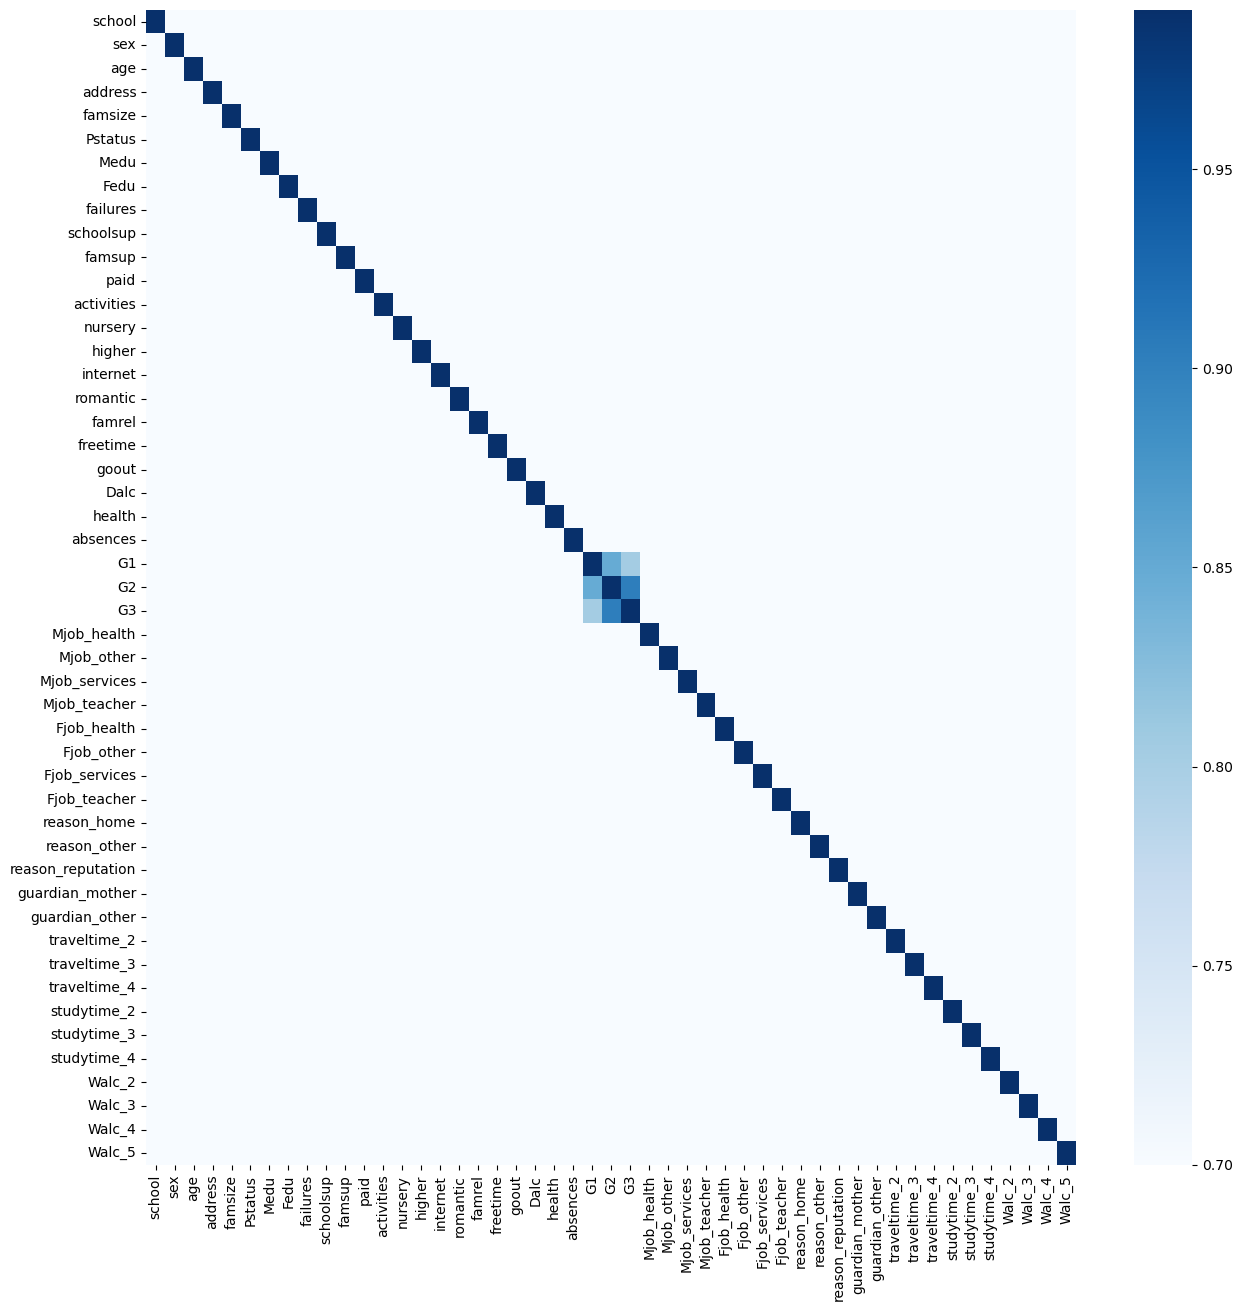

In [35]:
plt.figure(figsize=(15,15)) 
sns.heatmap(df.corr(), cmap='Blues',vmin=0.7, vmax=0.99) 

print('Se muestra una matriz de correlaciones. \n De acuerdo a la gráfica, no existen correlaciones importantes en la muestra\n mas allá de los vectores objetivos')

### Interpretación de regresores y modelos.

en G1_full el modelo tuvo un mal ajuste con una explicación de varianza del 22%.
Un indicador positivo es el Durbin- Watson ya que con un valor ponderado de >1.8, es buena señal de que no haya correlación positiva en los vectores.
EL modelo G1 depurado no desarrolló un mejor ajuste de varianza incluso, reduciendo el R2.

Los modelos G2, G3 tanto full como depurados tampoco presentaron una buena bondad de ajuste, además ambos modelos en comparación al G1 redujeron el estimador Durbin Watson por lo que podrían presentarse señales de correlación positiva pero no necesariamente sifgnificativa.

Cabe destacar que los  vectores 'failures+ schoolsup+ famsup+ freetime+ goout' aportan positivamente y se mantuvieron presentes en los 3 modelos aún depurados.

Los vectores sugeridos por la psicopedagoga no aportan al modelo ni pudieron ser analizados debido a los resultados de las pruebas de KMO (p value < 0.05 pero KM general ponderó 0.457).

Por último, no existen evidencias de correlaciones relevantes con el modelo, tanto reflejados en la matriz de correlaciones y en los estimadores Durbin-Watson de cada modelo.





### Estrategias de Modelación predictiva

Se seleccionarán las variables significantes obtenidas de los 3 modelos de regresion lineal( failures+ schoolsup+ famsup+ goout).

Se realizarán modelos con y sin  intercepto y balance.

Por último, se realizará una refactorizacion al modelo ya depurado para visualizar el comportamiento predictivo-

### Modelación predictiva



In [21]:
#Selección de las variables significativas.

df_dep = df[['failures', 'schoolsup', 'goout','famsup', 'freetime']] #indico las variables significantes. 

y_vec = df["G3"] #VO
X_mat = df_dep
X_train, X_test, y_train, y_test = train_test_split(X_mat, y_vec, test_size=.33, random_state =18608)


In [22]:
#Entrenando modelos.

#Modelo 1: Con intercepto y normalizado.
modelo_1 = linear_model.LinearRegression(fit_intercept = True, normalize = True)
modelo_1.fit(X_train, y_train)

#Modelo2 : Sin intercepto y normalizado.
modelo_2 = linear_model.LinearRegression(fit_intercept = False, normalize = True)
modelo_2.fit(X_train, y_train)

#Modelo3: Sin intercepto y no normalizado
modelo_3 = linear_model.LinearRegression(fit_intercept = False, normalize = False)
modelo_3.fit(X_train, y_train)

LinearRegression(fit_intercept=False, normalize=False)

In [23]:
#Generando predicciones para el modelo 1.

modelo_yhat1 = modelo_1.predict(X_test)
modelo_yhat1[:5]

array([11.87565977,  9.27495152, 13.00466197, 10.49597081, 12.72135906])

In [24]:
#Generando predicciones para el modelo 2.

modelo_yhat2 = modelo_2.predict(X_test)
modelo_yhat2[:5]

array([ 8.51620457, 10.13980899, 13.63637348, 12.26261052, 16.65550883])

In [25]:
#Generando predicciones para el modelo 3.

modelo_yhat3 = modelo_3.predict(X_test)
modelo_yhat3[:5]

array([ 8.51620457, 10.13980899, 13.63637348, 12.26261052, 16.65550883])

In [26]:
def report_scores(vector_predicho, vector_valido):
    error_medio = mean_squared_error(vector_valido, vector_predicho).round(5)
    r_cuadrado = r2_score(vector_valido, vector_predicho).round(5)        
    print(f' El error medio cuadrado del modelo es: {error_medio}')
    print(f' El R2 es de: {r_cuadrado}\n')

In [27]:
report_scores(modelo_yhat1, y_test)

 El error medio cuadrado del modelo es: 16.07558
 El R2 es de: 0.18882



In [28]:
report_scores(modelo_yhat2, y_test)

 El error medio cuadrado del modelo es: 24.73661
 El R2 es de: -0.24822



In [29]:
report_scores(modelo_yhat3, y_test)

 El error medio cuadrado del modelo es: 24.73661
 El R2 es de: -0.24822



### Refactorizando el modelo.

Para poder comparar modelos, refactorizaré el modelo predictivo seleccionando las 5 variables que posean mayor correlación de Pearson.
Para ello, utilizaré una funcion previamente utilizada en otros desafíos.

In [30]:
func.fetch_features(df)

Los 5 atributos, distintos de los vectores objetivos, con mayor correlación absoluta con el vector objetivo son:



,atributo,corr,abs_corr
24,G2,0.902984,0.902984
23,G1,0.803384,0.803384
8,failures,-0.345628,0.345628
19,goout,-0.221752,0.221752
6,Medu,0.180326,0.180326
14,higher,-0.162044,0.162044
2,age,-0.132134,0.132134
3,address,-0.119397,0.119397
21,health,-0.116279,0.116279
16,romantic,-0.115377,0.115377


In [31]:
#Selección de las variables significativa para el modelo refactorizado. estas son

df_dep = df[['failures', 'Medu', 'goout','higher', 'age']] #indico las variables significantes. 

y_vec = df["G3"] #VO
X_mat = df_dep
X_train, X_test, y_train, y_test = train_test_split(X_mat, y_vec, test_size=.33, random_state =18608)

In [32]:
#Entrenando modelos refactorizados.

#Modelo 1: Con intercepto y normalizado.
modelo_r_1 = linear_model.LinearRegression(fit_intercept = True, normalize = True)
modelo_r_1.fit(X_train, y_train)

#Modelo2 : Sin intercepto y normalizado.
modelo_r_2 = linear_model.LinearRegression(fit_intercept = False, normalize = True)
modelo_r_2.fit(X_train, y_train)

#Modelo3: Sin intercepto y no normalizado
modelo_r_3 = linear_model.LinearRegression(fit_intercept = False, normalize = False)
modelo_r_3.fit(X_train, y_train)

LinearRegression(fit_intercept=False, normalize=False)

In [33]:
#Generando predicciones para el modelo refactorizado 1.

modelo_yhat1_r = modelo_r_1.predict(X_test)
modelo_yhat1_r[:5]

array([12.61328378,  9.2811894 , 12.09471119, 11.43313749, 10.91609067])

In [34]:
#Generando predicciones para el modelo refactorizado 2.

modelo_yhat2_r = modelo_r_2.predict(X_test)
modelo_yhat2_r[:5]

array([12.47763436,  8.52037817, 11.64536771, 10.21381114, 13.55038917])

In [35]:
#Generando predicciones para el modelo refactorizado 3.

modelo_yhat3_r = modelo_r_3.predict(X_test)
modelo_yhat3[:5]

array([ 8.51620457, 10.13980899, 13.63637348, 12.26261052, 16.65550883])

In [36]:
report_scores(modelo_yhat1_r, y_test)

 El error medio cuadrado del modelo es: 16.43796
 El R2 es de: 0.17054



In [37]:
report_scores(modelo_yhat2_r, y_test)

 El error medio cuadrado del modelo es: 17.34701
 El R2 es de: 0.12467



In [38]:
report_scores(modelo_yhat3_r, y_test)

 El error medio cuadrado del modelo es: 17.34701
 El R2 es de: 0.12467



### Conclusiones

Los resultados son variados. El primer modelo presenta un error cuadrático medio considerablemente menor a los otros 2 modelos generados, además, se ajustó mejor a la varianza con un 18.8% versus los otros modelos que presentaron bondad de ajuste negativa. 

al refactorizar el modelo escogiendo solo los vectores que presenten correlación positiva, se volvieron a generar 3 modelos de predicción y, al igual que en el primer caso, el primer modelo refactorizado presento tambien mejores resultados que sus pares, ponderando un MAE de 16.43 y una bondad de ajuste del 17%. 
A raíz de lo anterior y en función de los resultados tangibles que otorgaron los modelos, se escoge el modelo numero 1 (normal y refactorizado) como el mejor para generar predicciones.